**Análise Exploratória**
- O principal objetivo desse trabalho é realizar a análise exploratório dos dados referentes à base de dados do Titanic no kaggle (https://www.kaggle.com/competitions/titanic/data)

### Importar e visualizar a base

In [1]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importando a base de dados
base = pd.read_csv('train.csv')

In [3]:
# Visualizando as 3 primeiras linhas
base.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
# Visualizando as 3 últimas linhas
base.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Verificando o tamanho da base
base.shape

(891, 12)

### Visualizando um resumo das informações

In [8]:
# Verificando as informações 
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# Contando a quantidade de valores nulos
base.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Verificando as informações estatísticas
base.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# Verificando a quantidade de valores diferentes na base
base.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

**Visualizando de forma gráfica**

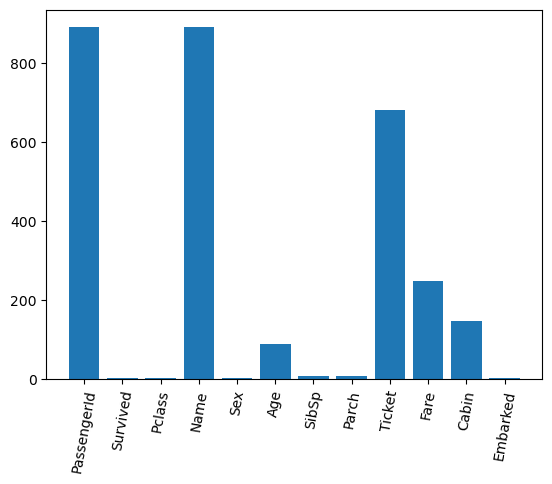

In [24]:
# Visualizando a informação acima de forma gráfica
fig, ax = plt.subplots()

ax.bar(base.nunique().index, base.nunique().values)

ax.tick_params(axis = 'x', labelrotation= 80)

plt.show()

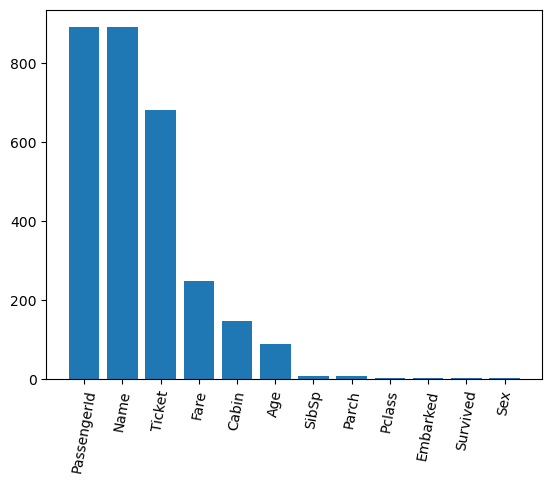

In [23]:
# Visualizando a informação acima de forma gráfica em ordem decrescente
fig, ax = plt.subplots()

ax.bar(base.nunique().sort_values(ascending = False).index, base.nunique().sort_values(ascending = False).values)

ax.tick_params(axis = 'x', labelrotation= 80)

plt.show()

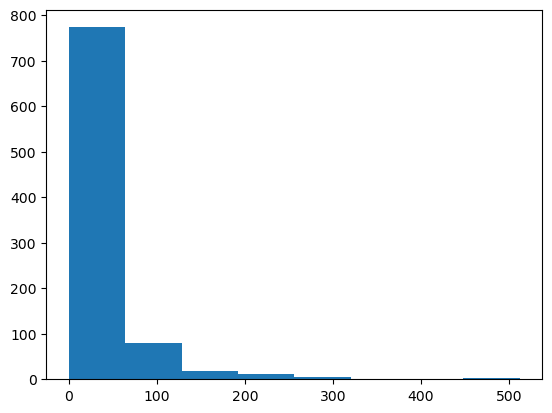

In [25]:
# Verificando o histograma das tarifas
fig, ax = plt.subplots()

ax.hist(base.Fare, bins=8)

plt.show()

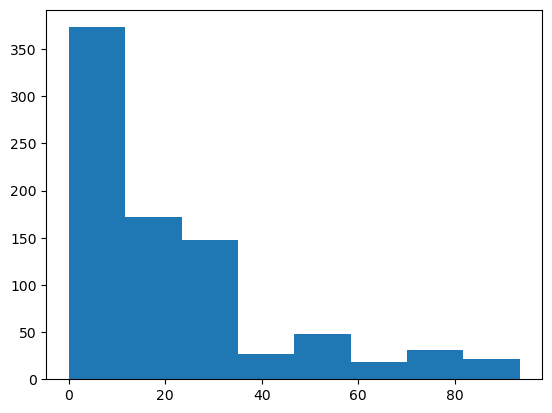

In [26]:
# Verificando o histograma das tarifas apenas para tarifas menores que 100 reais
fig, ax = plt.subplots()

ax.hist(base.loc[base.Fare < 100, 'Fare'], bins=8)

plt.show()

**Realizando um boxplot**

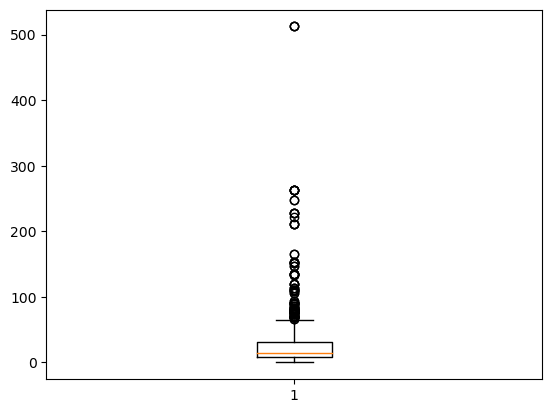

In [47]:
# Verificando para a coluna Fare
fig, ax = plt.subplots()
ax.boxplot(base.Fare)

plt.show()

In [32]:
# Podemos acessar qualquer um dos valores do .describe()
base.Fare.describe()['25%']

7.9104

In [35]:
# Determinando o interquartil
Q1 = base.Fare.describe()['25%']
Q3 = base.Fare.describe()['75%']
interquartil = Q3-Q1

# Calculando o valor máximo
vlr_max = Q3 + 1.5*interquartil

In [36]:
vlr_max

65.6344

In [37]:
# Agora filtrando os valores acima do máximo
base[base.Fare > vlr_max]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


**Interpretando esses valores**

In [41]:
# Contando o número de linhas da base
base.shape[0]/4

222.75

In [46]:
# Verificando a quantidade de registros em cada intervalo (<Q1, entre Q1 e Q2, entre Q2 e Q3,>Q3)
Q2 = base.Fare.describe()['50%']
base[(base.Fare > Q2)&(base.Fare < Q3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


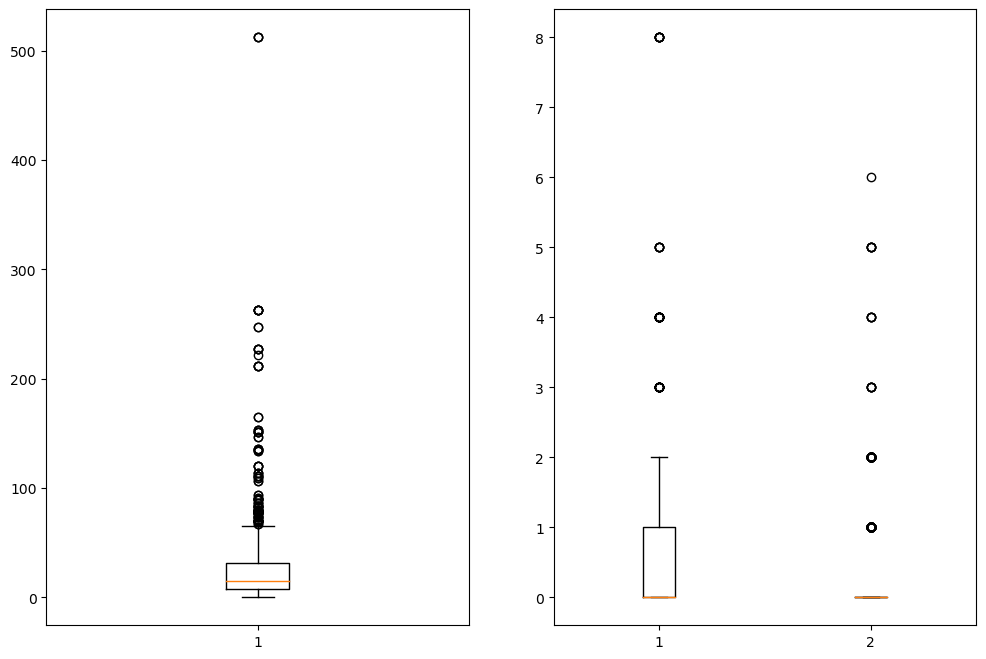

In [52]:
# Verificando para as colunas SibSp e Parch
fig, ax = plt.subplots(ncols=2, figsize=(12,8))
ax[0].boxplot(base.Fare)
ax[1].boxplot([base.SibSp, base.Parch])

plt.show()

**Qual o motivo do segundo boxplot ser mostrado dessa forma?**

In [54]:
# Verificando o value_counts()
base.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [55]:
# Verificando o resumo estatístico para essa coluna
base.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

**Outras opções de gráficos**

In [68]:
base.Pclass.value_counts().values

array([491, 216, 184])

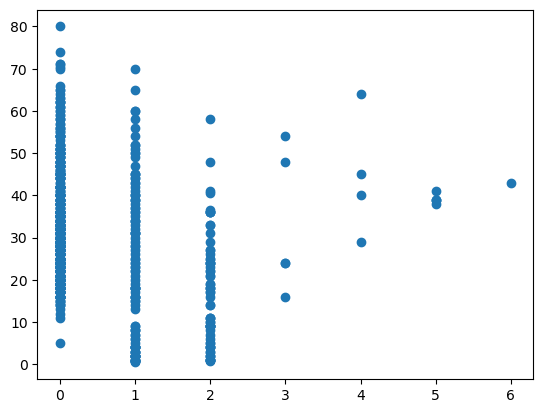

In [79]:
# Verificando se existe relação entre a coluna Parch e a idade
fig, ax = plt.subplots()

x= base.Parch
y= base.Age

ax.scatter(x, y)


plt.show()

**Criando uma matriz para mostrar a correlação de cada par de variáveis**

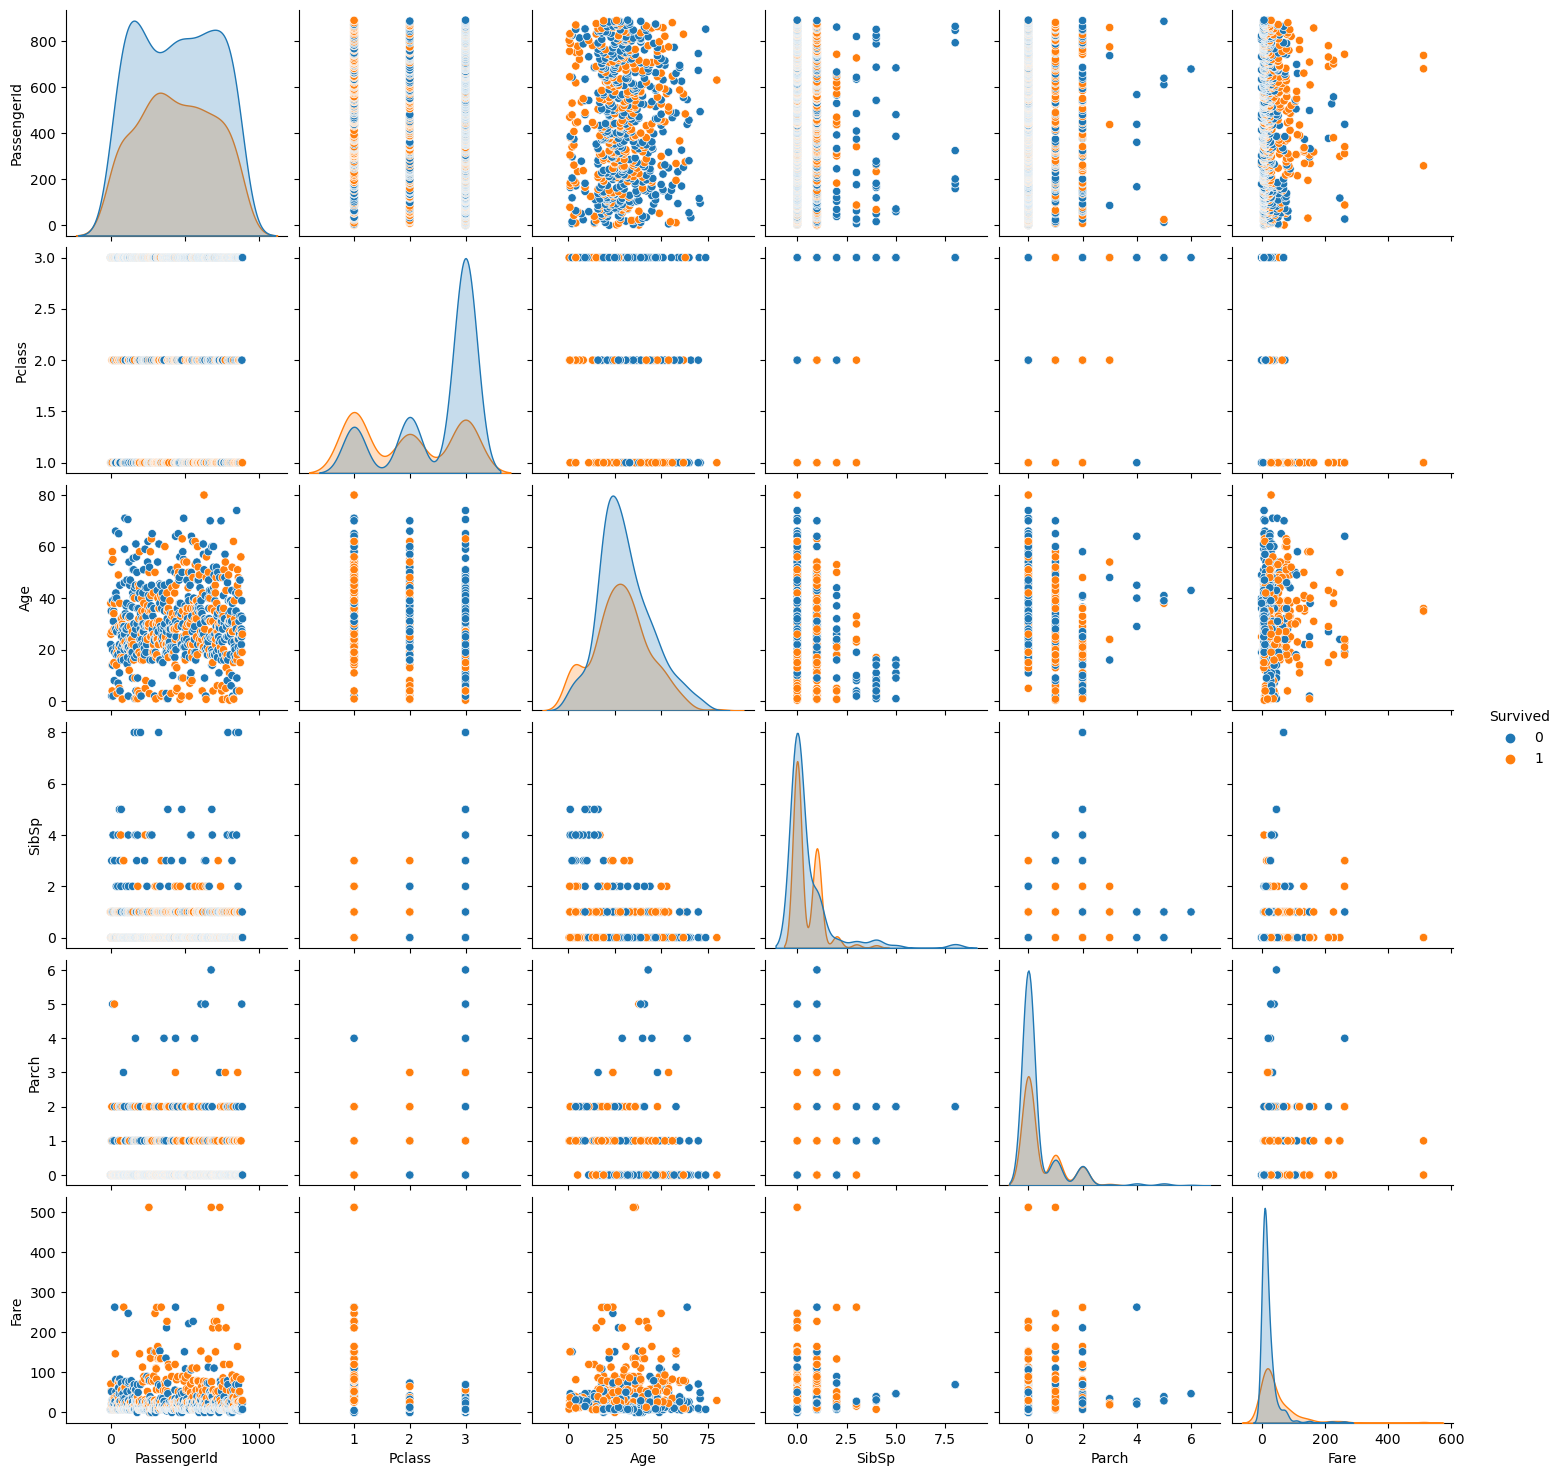

In [83]:
# Utilizando o seaborn
sns.pairplot(base, hue='Survived');

**Visualizando apenas o KDE**

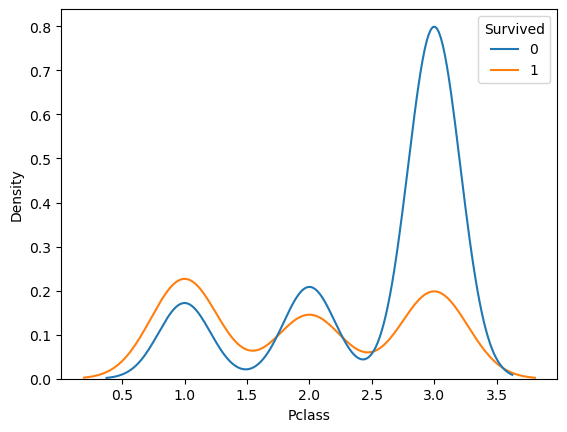

In [87]:
# Fazendo o kde para o Pclass
sns.kdeplot(base.Pclass, hue=base.Survived)
plt.show()

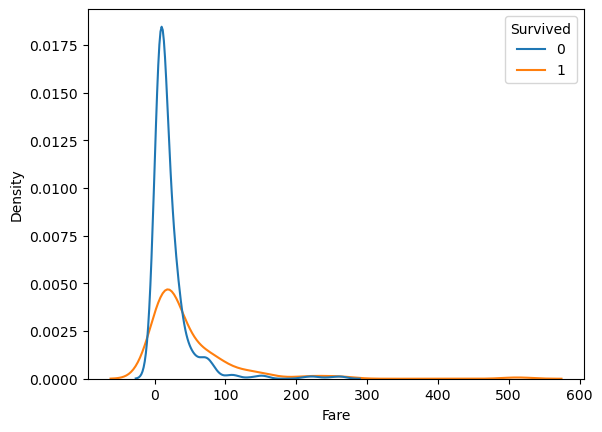

In [88]:
# Fazendo o kde para o Fare com e sem o Survived
sns.kdeplot(base.Fare, hue=base.Survived)
plt.show()

**Heatmap de correlação**

In [96]:
# Verificando a correlação entre os dados
base.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


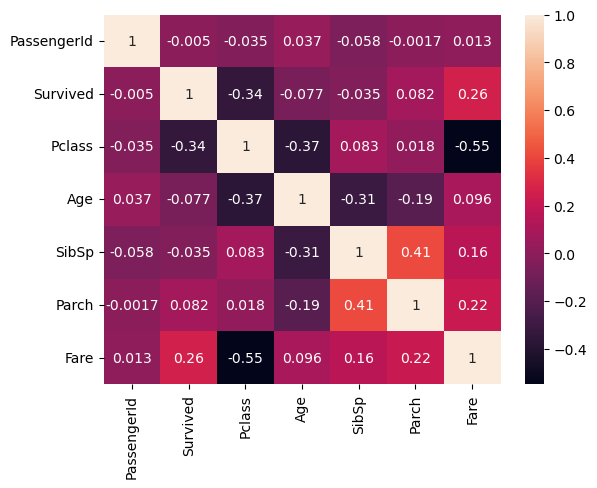

In [94]:
# Tornando visual
# cmap: https://matplotlib.org/stable/tutorials/colors/colormaps.html
sns.heatmap(base.corr(), annot=True)
plt.show()

**Tratando valores vazios e outliers**

#### Entendendo os outliers

In [106]:
# Verificando para a coluna Fare
base[base.Fare <1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [104]:
# Calculando a media
mean_Fare = base.Fare.mean()

In [105]:
base.loc[base.Fare <1, 'Fare'] = mean_Fare

#### Entendendo os valores nulos

In [109]:
# Verificando a base
base[base.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [115]:
# Entendendo melhor os valores
base.loc[base.Age.isnull(), 'Survived'].value_counts()

0    125
1     52
Name: Survived, dtype: int64

**Substituindo pelas média da idade**

In [117]:
# Calculando a média das idades
base.Age.mean()

29.69911764705882

In [119]:
# Substituindo os valores nulos por essa média
base.loc[base.Age.isnull(), 'Age'] = base.Age.mean()

In [120]:
# Verificando novamente a base
base[base.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
